In [1]:
# pip install pandas requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

def scrape_abstract(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.google.com',}
        response = requests.get(url, headers=headers)
        response.raise_for_status()

        if not response.encoding or response.encoding.lower() == 'iso-8859-1':
            response.encoding = 'utf-8'  # Fallback to UTF-8 if encoding is missing or incorrect
            
        soup = BeautifulSoup(response.text, 'html.parser')
        
        abstract_section = soup.find(class_='abstract-text row g-0') or soup.find('section', class_='abstract-text row g-0')
        if abstract_section:
            return abstract_section.get_text(strip=True)
        
        abstract = soup.find('p', text=lambda t: t and 'Abstract' in t)
        if abstract:
            return abstract.get_text(strip=True)

        return "Abstract not found"
    except Exception as e:
        return f"Error: {e}"

file_path = 'Publications.csv'
df = pd.read_csv(file_path)

if 'URL' not in df.columns:
    raise ValueError("no column named URL")

# df['Abstract'] = df['URL'].apply(scrape_abstract)
filtered_df = df[df['URL'].str.contains('ieee.org', na=False)]

abstracts = []
total_urls = len(filtered_df)
scraped_count = 0

for i, row in filtered_df.iterrows():
    url = row['URL']
    try:
        print(f"Scraping {scraped_count + 1}/{total_urls}: {url}")
        abstract = scrape_abstract(url)
        scraped_count += 1
    except Exception as e:
        abstract = f"Error: {e}"
    abstracts.append(abstract)
    time.sleep(1)


filtered_df['Abstract'] = abstracts
filtered_file_path = 'filtered_with_abstracts_ieee.csv'
filtered_df.to_csv(filtered_file_path, index=False)

'''
# Scrape abstracts only for filtered URLs
filtered_df['Abstract'] = filtered_df['URL'].apply(scrape_abstract)

# Save the results to a new CSV file
filtered_file_path = 'filtered_with_abstracts_2.csv'
filtered_df.to_csv(filtered_file_path, index=False)
print(f"Filtered results saved to {filtered_file_path}")
'''

Starting to scrape 69 URLs...
Scraping 1/69: https://ieeexplore.ieee.org/document/9964409


C:\Users\loorandg\AppData\Local\Temp\ipykernel_1996\3531651680.py:27: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  abstract = soup.find('p', text=lambda t: t and 'Abstract' in t)


Scraping 2/69: https://ieeexplore.ieee.org/document/9435780?source=authoralert
Scraping 3/69: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=arnumber=9558815
Scraping 4/69: https://ieeexplore.ieee.org/document/9918026
Scraping 5/69: https://ieeexplore.ieee.org/document/9609565
Scraping 6/69: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=arnumber=9435331
Scraping 7/69: https://ieeexplore.ieee.org/abstract/document/9253519
Scraping 8/69: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=arnumber=10210046
Scraping 9/69: https://ieeexplore.ieee.org/document/9648000
Scraping 10/69: https://ieeexplore.ieee.org/document/9833232
Scraping 11/69: https://ieeexplore.ieee.org/iel7/6287639/6514899/10177160.pdf
Scraping 12/69: https://ieeexplore.ieee.org/document/9600859
Scraping 13/69: https://ieeexplore.ieee.org/document/9628107
Scraping 14/69: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=arnumber=9334991
Scraping 15/69: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=arnumber=8865062
Scraping 16/6

C:\Users\loorandg\AppData\Local\Temp\ipykernel_1996\3531651680.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Abstract'] = abstracts


'\n# Scrape abstracts only for filtered URLs\nfiltered_df[\'Abstract\'] = filtered_df[\'URL\'].apply(scrape_abstract)\n\n# Save the results to a new CSV file\nfiltered_file_path = \'filtered_with_abstracts_2.csv\'\nfiltered_df.to_csv(filtered_file_path, index=False)\nprint(f"Filtered results saved to {filtered_file_path}")\n'

In [74]:
import pandas as pd
# from urllib.parse import urlparse
import tldextract

file_path = 'Publications.csv'
df = pd.read_csv(file_path)

if 'URL' not in df.columns:
    raise ValueError("no column named URL")
    
def extract_base_domain(url):
    try:
        extracted = tldextract.extract(url)
        return f"{extracted.domain}.{extracted.suffix}"
    except Exception:
        return None
        
df['Base_Domain'] = df['URL'].apply(extract_base_domain)
domain_counts = df['Base_Domain'].value_counts()
domain_counts_df = domain_counts.reset_index()
domain_counts_df.columns = ['Base_Domain', 'Count']
domain_counts_df.head(20)
# domain_counts_df.describe()

,Base_Domain,Count
0,.,853
1,mdpi.com,540
2,sciencedirect.com,242
3,wiley.com,129
4,frontiersin.org,118
5,utlib.ee,103
6,doi.org,102
7,kirj.ee,88
8,springer.com,88
9,tandfonline.com,85


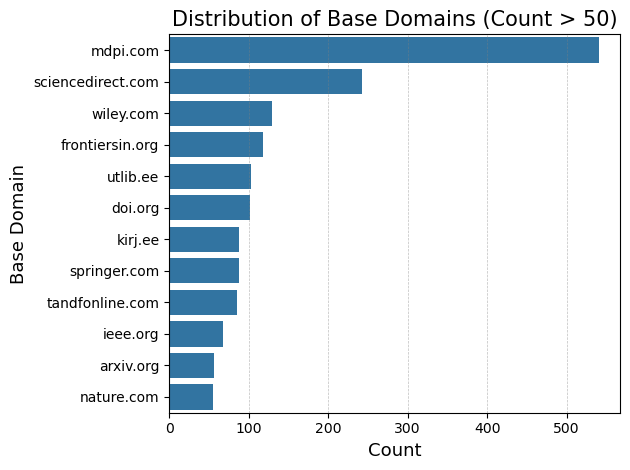

In [80]:
threshold = 50
domain_counts_df['Base_Domain'] = domain_counts_df['Base_Domain'].where(domain_counts_df['Count'] > threshold, 'Other')
df_final = domain_counts_df.groupby('Base_Domain')['Count'].sum().reset_index()
df_final = df_final.sort_values(by='Count', ascending=False)
df_final = df_final.drop([0, 1, 5], axis=0) # drop faulty domains
# print(df_final.head(20))

sns.barplot(data=df_final, x='Count', y='Base_Domain')
# plt.xscale('log')
plt.title('Distribution of Base Domains (Count > 50)', fontsize=15)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Base Domain', fontsize=13)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()
plt.savefig('domain_distribution.svg', format='svg')
plt.show()

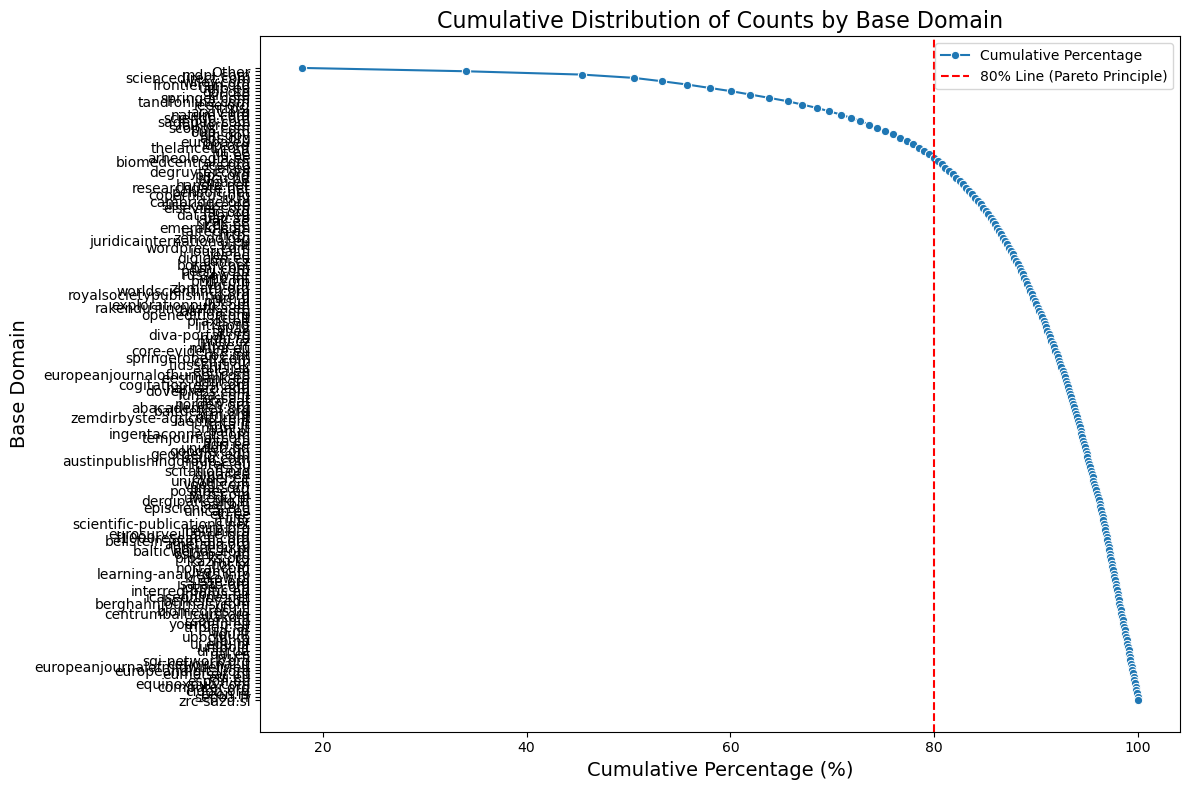

In [1]:
# pip install unidecode

In [5]:
from unidecode import unidecode
import pandas as pd

def clean_text(text):
    if isinstance(text, str):
        normalized_text = unidecode(text)
        clean_text = normalized_text.encode('ascii', 'ignore').decode('ascii')
        
        return clean_text
    return text

file_path = 'Publications_uncleaned.csv'
df = pd.read_csv(file_path)
df_cleaned = df.applymap(clean_text)

output = 'Publications_cleaned.csv'
df_cleaned.to_csv(output, index=False)

C:\Users\loorandg\AppData\Local\Temp\ipykernel_5644\1513170315.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(clean_text)


Text cleaning completed. Cleaned file saved at: Publications_cleaned.csv


In [19]:
import pandas as pd

file_path = 'Publications_all.csv'
df = pd.read_csv(file_path)
df['Abstract'] = df['Abstract'].str.replace(r'^Discussion:', '', regex=True)

output = 'Publications_all.csv'
df.to_csv(output, index=False)

Updated 'Abstract' column. Cleaned file saved at: Publications_all.csv
